In [1]:
from sympy import *

    

t, r, theta, phi = symbols('t, r, \\theta, \\varphi')
dt, dr, dtheta, dphi = symbols('\\Delta{t} \\Delta{r} \\Delta\\theta \\Delta\\varphi')
l0, l1, l2, l3 = symbols("l_0 l_1 l_2 l_3")
l = symbols("\\lambda")

def DELDEL(f, g):
    canon = -f.diff(t)*g.diff(t) + l1*f.diff(r)*g.diff(r) + l1*f.diff(theta)*g.diff(theta) + l2*f.diff(phi)*g.diff(phi)
    return canon

def BOX(f):
    canon = -f.diff(t, 2) + l1*f.diff(r, 2) + l1*f.diff(theta, 2) + l2*f.diff(phi, 2)
    return canon

def DELf(f, g):
    canon = -(f*g.diff(t)).diff(t) + l1*(f*g.diff(r)).diff(r)+ l1*(f*g.diff(theta)).diff(theta) + l2*(f*g.diff(phi)).diff(phi)
    return canon

n1 = Function("\\nabla_\mu")
n2 = Function("\\nabla^\mu")

n3 = Function("\\nabla_\nu")
n4 = Function("\\nabla^\nu")
box = Function("\Box")

alfa = Function("\\alpha")(t, r, theta, phi)
F = Function("F")(t, r, theta, phi)
G = Function("G")(t, r, theta, phi)

#test1 = (-box(alfa) + sin(alfa)*cos(alfa)*(n1(F)*n2(F) + sin(F)*sin(F)*n1(G)*n2(G)));
with evaluate(False):
    #test1 = (n1(alfa)*n2(F))**2
    #test1 = sin(alfa)*cos(alfa)*sin(F)**2*((n1(alfa)*n2(alfa))*(n3(F)*n4(F)) - (n1(alfa)*n2(F))**2 )
#     test1 = (box(alfa)+sin(alfa)*cos(alfa)*(n1(F)*n2(F) + sin(F)**2*(n1(G)*n2(G)))) + l*(
#         sin(alfa)*cos(alfa)*((n1(alfa)*n2(alfa))*(n3(F)*n4(F)) - (n1(alfa)*n2(F))**2) +
#         sin(alfa)*cos(alfa)*sin(F)**2*((n1(alfa)*n2(alfa))*(n3(G)*n4(G)) - (n1(alfa)*n2(G))**2) + 
#         2*sin(alfa)**3*cos(alfa)*sin(F)**2*((n1(F)*n2(F))*(n3(G)*n4(G)) - (n1(F)*n2(G))**2) -
#         n1(sin(alfa)**2*(n3(F)*n4(F))*n2(alfa))+n1(sin(alfa)**2*(n3(alfa)*n4(F))*n2(F)) -
#         n1(sin(alfa)**2*sin(F)**2*(n3(G)*n4(G))*n2(alfa))+n1(sin(alfa)**2*sin(F)**2*(n3(alfa)*n4(G))*n2(G)) )

    test1 = (box(alfa)+sin(alfa)*cos(alfa)*(n1(F)*n2(F) + sin(F)**2*(n1(G)*n2(G)))) + l*(
         sin(alfa)*cos(alfa)*((n1(alfa)*n2(alfa))*(n3(F)*n4(F)) - (n1(alfa)*n2(F))**2) +
         sin(alfa)*cos(alfa)*sin(F)**2*((n1(alfa)*n2(alfa))*(n3(G)*n4(G)) - (n1(alfa)*n2(G))**2) + 
         2*sin(alfa)**3*cos(alfa)*sin(F)**2*((n1(F)*n2(F))*(n3(G)*n4(G)) - (n1(F)*n2(G))**2) -
         n1(sin(alfa)**2*(n3(F)*n4(F))*n2(alfa))+n1(sin(alfa)**2*(n3(alfa)*n4(F))*n2(F)) -
         n1(sin(alfa)**2*sin(F)**2*(n3(G)*n4(G))*n2(alfa))+n1(sin(alfa)**2*sin(F)**2*(n3(alfa)*n4(G))*n2(G)) )

    #                     
test2 = n1(sin(F)*G*n2(F))
test3 = F*alfa
#test2 = test2.expand()
#display(test2)

#display(test1)


In [2]:
#fg = test3.diff(r).replace(lambda arg: arg.is_Derivative, lambda arg: arg.as_finite_difference(dr))
#display(fg)
#fh = test3.diff(r).replace(Derivative(p, q)*s, lambda p, q, s : FOD(p, q)*s)
#fh

In [3]:
#kk = Derivative(Derivative(alfa, r), t)
#kk.
#kj = kk.as_finite_difference(dr)
#display(kj)
#solveset(kj, final)

In [4]:
p, q, s, b = map(Wild, 'pqsb')
#res2 = test2.replace(n1(p*n2(q)), lambda p, q : DELf(p, q))
#res2 = test2.replace(n1(p*n2(q)), G)
#def hacer(arg):
#    print(len(arg.variables))
#res100 = res2.replace(lambda arg: arg.is_Derivative, lambda arg: hacer(arg))#arg.as_finite_difference(dr))
#display(test2.find(n1(p*n2(q))))
#final = Function("F")(t, r+dr/2, theta, phi)
#final

In [5]:

res = test1.replace(n1(p)*n2(q)*s, lambda p, q, s : DELDEL(p, q)*s)
#display(res)
res = res.replace(n3(p)*n4(q)*s, lambda p, q, s : DELDEL(p, q)*s)

#display(res)

#print("welta")

res2 = res.replace(n1(p*n2(q)), lambda p, q : DELf(p, q))
res2 = res2.replace(n3(p*n4(q)), lambda p, q : DELf(p, q))

#display(res2)

res3 = res2.replace(box(p)*s, lambda p, s : BOX(p)*s)

#display(res3)

In [26]:
import numpy as np
ndmat = np.array([[[[[symbols("a") for _x in range(3)] for _y in range(3)] for _z in range(3)] for _w in range(3)] for _i in range(3)])

def getFuncName(i):
    if i==0:
        return "\\alpha"
    if i==1:
        return "F"
    if i==2:
        return "G"
    
def i2d(i):
    if i==0:
        return "-1"
    if i==1:
        return ""
    if i==2:
        return "+1"

for _f in range(3):
    for _t in range(3):
        for _r in range(3):
            for _theta in range(3):
                for _phi in range(3):
                    ndmat[_f][_t][_r][_theta][_phi] = symbols(getFuncName(_f)+"^{n"+i2d(_t)+"}_{i"+i2d(_r)+"j"+i2d(_theta)+"k"+i2d(_phi)+"}")

ndmat[0][0][2][2][1]

In [8]:

def getDelta(i):
    if i == t:
        return dt
    if r == i:
        return dr
    if theta == i:
        return dtheta
    if phi == i:
        return dphi

def getIndex(i):
    if t == i:
        return 0
    if r == i:
        return 1
    if theta == i:
        return 2
    if phi == i:
        return 3

def getFuncIndex(f):
    if f==F:
        return 1
    if f==G:
        return 2
    if f==alfa:
        return 0
    
def isThis(s, ix):
    if ix != None and s in ix.keys():
        return ix[s]
    else: 
        return 0
    
def getDiscreteSymbol(ndmat, f, ix=None):
    canon = ndmat[getFuncIndex(f)][1+isThis(t, ix)][1+isThis(r, ix)][1+isThis(theta, ix)][1+isThis(phi, ix)]
    return canon
    
def FOD(f, i):
    canon = (getDiscreteSymbol(ndmat, f, ix={i:1}) - getDiscreteSymbol(ndmat, f, ix={i:-1}))/(2*getDelta(i))

    return canon

def SOD(f, i, j):
    if i==j:
        canon = (getDiscreteSymbol(ndmat, f, ix={i:1}) - 2*getDiscreteSymbol(ndmat, f) + getDiscreteSymbol(ndmat, f, ix={i:-1}))/(getDelta(i)**2)
    else:
        canon = (getDiscreteSymbol(ndmat, f, ix={i:1, j:1}) + getDiscreteSymbol(ndmat, f, ix={i:-1, j:-1}) - getDiscreteSymbol(ndmat, f, ix={i:1, j:-1}) - getDiscreteSymbol(ndmat, f, ix={i:-1, j:1}) )/(4*getDelta(i)*getDelta(j))
    return canon

def discreti(arg):
    if len(arg.variables) == 1:
        return FOD(arg.expr, arg.variables[0])
    elif len(arg.variables) == 2:
        return SOD(arg.expr, arg.variables[0], arg.variables[1])
    else:
        return None
#res4 = res3.replace(Derivative(p, q)*s, lambda p, q, s : FOD(p, q)*s)
#res5 = res4.replace(Derivative(Derivative(p, q), q)*s, lambda p, q, s : SOD(p, q, q)*s)
#res6 = res5.replace(Derivative(Derivative(p, q), b)*s, lambda p, q, s, b : SOD(p, q, b)*s)
res6 = res3.replace(lambda arg: arg.is_Derivative, lambda arg: discreti(arg))

res7 = res6.replace(F, getDiscreteSymbol(ndmat, F))
res7 = res7.replace(G, getDiscreteSymbol(ndmat, G))
res7 = res7.replace(alfa, getDiscreteSymbol(ndmat, alfa))

#display(res7)

In [27]:
factors = res7.args
factors[1]
ccode(res7)

'\\lambda*(l_1*((1.0/2.0)*(F^{n}_{ij+1k} - F^{n}_{ij-1k})*(-1.0/8.0*(F^{n+1}_{ijk} - F^{n-1}_{ijk})*(\\alpha^{n+1}_{ij+1k} - \\alpha^{n+1}_{ij-1k} - \\alpha^{n-1}_{ij+1k} + \\alpha^{n-1}_{ij-1k})/(\\Delta\\theta*pow(\\Delta{t}, 2)) - 1.0/8.0*(\\alpha^{n+1}_{ijk} - \\alpha^{n-1}_{ijk})*(F^{n+1}_{ij+1k} - F^{n+1}_{ij-1k} - F^{n-1}_{ij+1k} + F^{n-1}_{ij-1k})/(\\Delta\\theta*pow(\\Delta{t}, 2)) + (1.0/8.0)*l_1*(F^{n}_{i+1jk} - F^{n}_{i-1jk})*(\\alpha^{n}_{i+1j+1k} - \\alpha^{n}_{i+1j-1k} - \\alpha^{n}_{i-1j+1k} + \\alpha^{n}_{i-1j-1k})/(\\Delta\\theta*pow(\\Delta{r}, 2)) + (1.0/8.0)*l_1*(\\alpha^{n}_{i+1jk} - \\alpha^{n}_{i-1jk})*(F^{n}_{i+1j+1k} - F^{n}_{i+1j-1k} - F^{n}_{i-1j+1k} + F^{n}_{i-1j-1k})/(\\Delta\\theta*pow(\\Delta{r}, 2)) + (1.0/8.0)*l_2*(F^{n}_{ijk+1} - F^{n}_{ijk-1})*(\\alpha^{n}_{ij+1k+1} - \\alpha^{n}_{ij+1k-1} - \\alpha^{n}_{ij-1k+1} + \\alpha^{n}_{ij-1k-1})/(\\Delta\\theta*pow(\\Delta\\varphi, 2)) + (1.0/8.0)*l_2*(\\alpha^{n}_{ijk+1} - \\alpha^{n}_{ijk-1})*(F^{n}_{ij+1k

In [21]:
jnjn = solve(res7.args[2], ndmat[0][2][1][1][1], minimal=True, warn=True, simplify=False)
init_printing()
jnjn

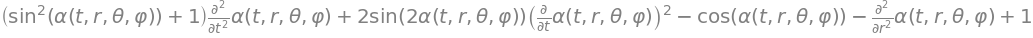

In [3]:
test3 = (1+sin(alfa)**2)*Derivative(alfa, t, 2) + 2*sin(2*alfa)*(Derivative(alfa, t))**2-Derivative(alfa, r, 2)+1-cos(alfa)
test3

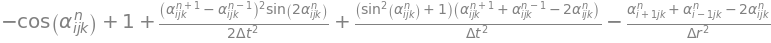

In [9]:
res4 = test3.replace(Derivative(p, q)*s, lambda p, q, s : FOD(p, q)*s)
res5 = res4.replace(Derivative(Derivative(p, q), q)*s, lambda p, q, s : SOD(p, q, q)*s)
res6 = res5.replace(Derivative(Derivative(p, q), b)*s, lambda p, q, s, b : SOD(p, q, b)*s)


res7 = res6.replace(F, getDiscreteSymbol(ndmat, F))
res7 = res7.replace(G, getDiscreteSymbol(ndmat, G))
res7 = res7.replace(alfa, getDiscreteSymbol(ndmat, alfa))
res7

In [26]:
jnjn = solveset(res7, ndmat[0][2][1][1][1])

In [132]:
jnjn

KeyboardInterrupt: 

In [12]:
ndmat[0][2][1][1][1]